In [349]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [350]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
all_data = pd.concat([train,test])

In [351]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

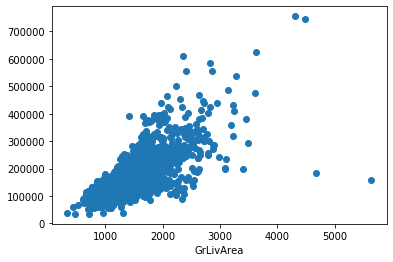

In [352]:
fig,ax =plt.subplots()
ax=plt.scatter(x=all_data['GrLivArea'],y=all_data['SalePrice'])
plt.xlabel('GrLivArea')
plt.show()

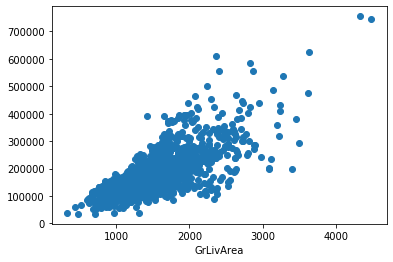

In [353]:
all_data = all_data.drop(all_data[(all_data['GrLivArea']>4000) & (all_data['SalePrice']<300000)].index)
fig,ax =plt.subplots()
ax=plt.scatter(x=all_data['GrLivArea'],y=all_data['SalePrice'])
plt.xlabel('GrLivArea')
plt.show()

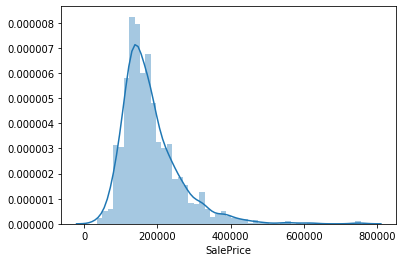

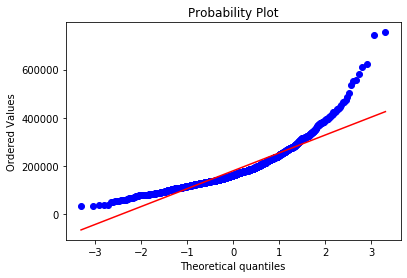

In [354]:
sns.distplot(train['SalePrice'])
fig = plt.figure()
res=stats.probplot(train['SalePrice'],plot=plt)
plt.show()

In [355]:
train["SalePrice"] = np.log1p(train["SalePrice"])

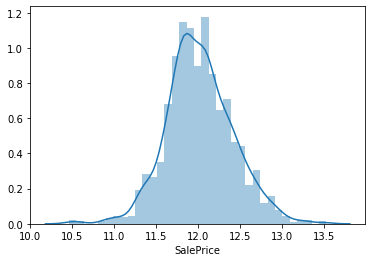

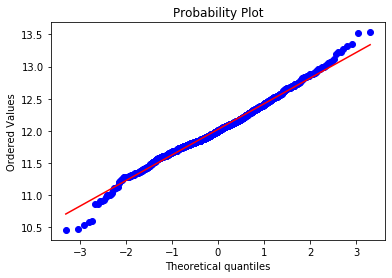

In [356]:
sns.distplot(train['SalePrice'])
fig = plt.figure()
res=stats.probplot(train['SalePrice'],plot=plt)
plt.show()

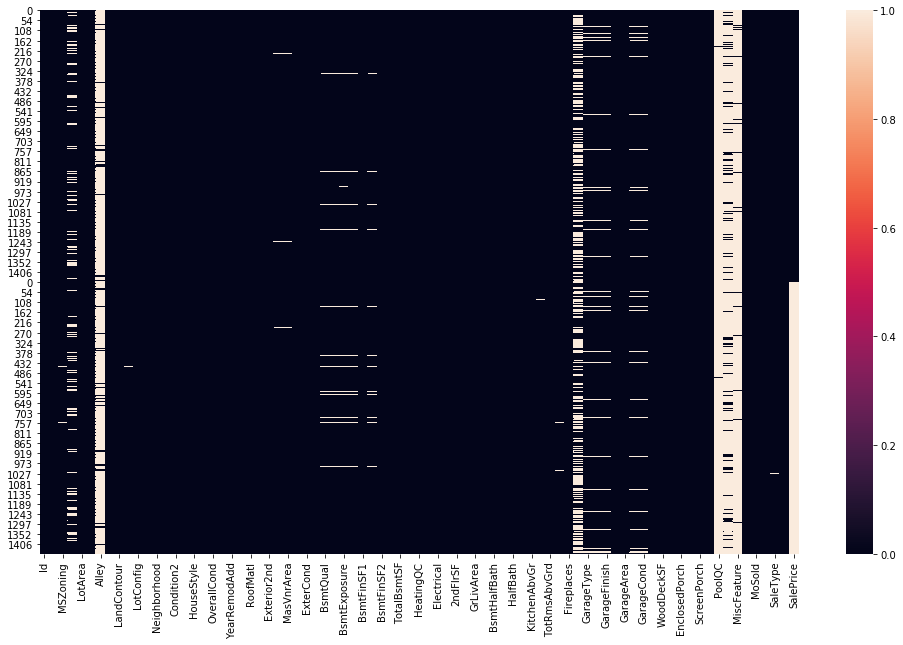

In [357]:
plt.figure(figsize=(17,10))
sns.heatmap(all_data.isnull())

In [358]:
all_data['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [359]:
all_data['PoolQC']=all_data['PoolQC'].fillna('None')

In [360]:
all_data['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [361]:
all_data['GarageCond']=all_data['GarageCond'].fillna('None')

In [362]:
all_data['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [363]:
all_data['GarageFinish']=all_data['GarageFinish'].fillna('None')
all_data['GarageQual']=all_data['GarageQual'].fillna('None')

In [364]:
all_data['GarageType']=all_data['GarageType'].fillna('None')

In [365]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [366]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [367]:
all_data['MSZoning']=all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [368]:
all_data['Alley']=all_data['Alley'].fillna('None')

In [369]:
all_data['LotFrontage']=all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [370]:
all_data['Fireplaces']=all_data['Fireplaces'].fillna('None')

In [371]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [372]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [373]:
all_data['Fence']=all_data['Fence'].fillna('None')

In [374]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [375]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [376]:
all_data_na = (all_data.isnull().sum()) 
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]

In [377]:
na=pd.DataFrame(all_data_na)

In [378]:
na

,0
MiscFeature,2810
SalePrice,1457
FireplaceQu,1419
Utilities,2
SaleType,1
KitchenQual,1
Electrical,1


In [379]:
all_data['Electrical']=all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [380]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [381]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [382]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [383]:
all_data_na = (all_data.isnull().sum()) 
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
na=pd.DataFrame(all_data_na)
na

,0
SalePrice,1457
Utilities,2
SaleType,1
KitchenQual,1


In [384]:
all_data['MiscFeature']=all_data['MiscFeature'].fillna(all_data['MiscFeature'].mode()[0])
all_data['Saleprice']=all_data['SalePrice'].fillna(np.mean(all_data['SalePrice']))
all_data['Utilities']=all_data['Utilities'].fillna(all_data['Utilities'].mode()[0])
all_data['SaleType']=all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['KitchenQual']=all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [385]:
all_data_na = (all_data.isnull().sum()) 
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
na=pd.DataFrame(all_data_na)
na

,0
SalePrice,1457


In [386]:
y_train=train['SalePrice']

In [387]:
all_data.drop('SalePrice',axis=1,inplace=True)

In [388]:
all_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Saleprice        0
Length: 81, dtype: int64

In [397]:
cols=all_data.select_dtypes(include=['int64','float64']).columns
scaleable=all_data[cols].copy()

In [398]:
mi=StandardScaler()
scaleable.drop(['YearBuilt','YearRemodAdd','YrSold','MoSold','Id','GarageCars','OverallQual','OverallCond','GarageYrBlt','Fireplaces','MSSubClass'],axis=1,inplace=True)
scaleable.columns
#mi.fit(scaleable)
#scaled_data = mi.transform(scaleable)
#scaldone=pd.DataFrame(scaled_data,columns=scaleable.columns)

scaldone=scaleable.copy()

In [399]:
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500.000000
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500.000000
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500.000000
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.000000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,6,2006,WD,Normal,180932.919067
1455,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2006,WD,Abnorml,180932.919067
1456,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,9,2006,WD,Abnorml,180932.919067
1457,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,Shed,700,7,2006,WD,Normal,180932.919067


In [400]:
forencode=all_data[all_data.select_dtypes(include=['object']).columns]

In [401]:
dum=pd.get_dummies(forencode)

In [402]:
dum

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1455,0,0,0,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1456,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1457,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [403]:
scaldone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2915 entries, 0 to 1458
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2915 non-null   float64
 1   LotArea        2915 non-null   int64  
 2   MasVnrArea     2915 non-null   float64
 3   BsmtFinSF1     2915 non-null   float64
 4   BsmtFinSF2     2915 non-null   float64
 5   BsmtUnfSF      2915 non-null   float64
 6   TotalBsmtSF    2915 non-null   float64
 7   1stFlrSF       2915 non-null   int64  
 8   2ndFlrSF       2915 non-null   int64  
 9   LowQualFinSF   2915 non-null   int64  
 10  GrLivArea      2915 non-null   int64  
 11  BsmtFullBath   2915 non-null   float64
 12  BsmtHalfBath   2915 non-null   float64
 13  FullBath       2915 non-null   int64  
 14  HalfBath       2915 non-null   int64  
 15  BedroomAbvGr   2915 non-null   int64  
 16  KitchenAbvGr   2915 non-null   int64  
 17  TotRmsAbvGrd   2915 non-null   int64  
 18  GarageAr

In [404]:
scaldone.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Saleprice
0,65.0,8450,196.0,706.0,0.0,150.0,856.0,856,854,0,...,8,548.0,0,61,0,0,0,0,0,208500.0
1,80.0,9600,0.0,978.0,0.0,284.0,1262.0,1262,0,0,...,6,460.0,298,0,0,0,0,0,0,181500.0
2,68.0,11250,162.0,486.0,0.0,434.0,920.0,920,866,0,...,6,608.0,0,42,0,0,0,0,0,223500.0
3,60.0,9550,0.0,216.0,0.0,540.0,756.0,961,756,0,...,7,642.0,0,35,272,0,0,0,0,140000.0
4,84.0,14260,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,...,9,836.0,192,84,0,0,0,0,0,250000.0


In [405]:
dum

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1455,0,0,0,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1456,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1457,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [406]:
dum.shape

(2915, 265)

In [407]:
scaldone.shape

(2915, 27)

In [408]:
scaldone.reset_index(drop=True, inplace=True)
dum.reset_index(drop=True, inplace=True)
all_data = pd.concat([scaldone, dum], axis=1)

In [409]:
all_data

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706.0,0.0,150.0,856.0,856,854,0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,0.0,978.0,0.0,284.0,1262.0,1262,0,0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,162.0,486.0,0.0,434.0,920.0,920,866,0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,0.0,216.0,0.0,540.0,756.0,961,756,0,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,21.0,1936,0.0,0.0,0.0,546.0,546.0,546,546,0,...,0,0,0,1,0,0,0,0,1,0
2911,21.0,1894,0.0,252.0,0.0,294.0,546.0,546,546,0,...,0,0,0,1,1,0,0,0,0,0
2912,160.0,20000,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,...,0,0,0,1,1,0,0,0,0,0
2913,62.0,10441,0.0,337.0,0.0,575.0,912.0,970,0,0,...,0,0,0,1,0,0,0,0,1,0


In [410]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train['SalePrice']

In [411]:
from sklearn.linear_model import Ridge,RidgeCV,LassoCV,LassoLarsCV
from sklearn.model_selection import cross_val_score

In [412]:
ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg=GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(X_train,y)
print("The best value of Alpha is: ",ridge_reg.best_params_)
print("The best score achieved with Alpha=11 is: ",np.sqrt(-ridge_reg.best_score_))
ridge_pred=np.sqrt(-ridge_reg.best_score_)

The best value of Alpha is:  {'alpha': 100}
The best score achieved with Alpha=11 is:  0.38564274458942577


In [413]:
lasso=Lasso()
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
lasso_reg=GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(X_train,y)
print("The best value of Alpha is: ",lasso_reg.best_params_)
lasso_pred=np.sqrt(-lasso_reg.best_score_)
print("The best score achieved with Alpha=1 is: ",np.sqrt(-lasso_reg.best_score_))

The best value of Alpha is:  {'alpha': 100}
The best score achieved with Alpha=1 is:  0.3799660059057275


In [420]:
xgb = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,y)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:   35.9s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    validate_parameters=False, verbosity=None),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_chi

In [421]:
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

In [422]:
xgb_best=XGBRegressor(
 colsample_bytree= 0.7,
 learning_rate= 0.03,
 max_depth= 5,
 min_child_weight= 4,
 n_estimators= 500,
 nthread= 4,
 objective= 'reg:linear',
 silent= 1,
 subsample= 0.7)

In [426]:
xgb_best.fit(X_train,y)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.03, max_delta_step=0, max_depth=5,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, silent=1, subsample=0.7, tree_method=None,
             validate_parameters=False, verbosity=None)

In [428]:
pred_xgb=xgb_best.predict(X_test)